In [89]:
import sympy as sp
from sympy import *
init_printing()
from IPython.display import display, Latex, HTML
import numpy as np

#### Loading .mat files

In [6]:
# .mat files are files that are stored in Matlab format and are commonly used in exam cases.
# Make sure the file is located in home or else add directory.
from scipy.io import loadmat
Data = loadmat("ALI2018_6.mat")
Data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'CPU', 'Order_lines_per_day'])

#### Loading .csv files

In [5]:
# Make sure the file is located in home or else add directory.
import pandas as pd 
myFile = pd.read_csv('flights.csv', sep=',')

# Note that I specify the seperator. You may also want to omit headers,
# if there are no headers. See the documentation for read_csv

,year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
0,2013,1,1,517.0,2.0,830.0,11.0,UA,N14228,1545,EWR,IAH,227.0,1400,5.0,17.0
1,2013,1,1,533.0,4.0,850.0,20.0,UA,N24211,1714,LGA,IAH,227.0,1416,5.0,33.0
2,2013,1,1,542.0,2.0,923.0,33.0,AA,N619AA,1141,JFK,MIA,160.0,1089,5.0,42.0
3,2013,1,1,554.0,-6.0,812.0,-25.0,DL,N668DN,461,LGA,ATL,116.0,762,5.0,54.0
4,2013,1,1,554.0,-4.0,740.0,12.0,UA,N39463,1696,EWR,ORD,150.0,719,5.0,54.0


#### Changing formates

In [56]:
# Sometimes the data type is stored insufficiently. Consider the following:
x = Data['Order_lines_per_day']
y = Data['CPU']
x

array([[16483],
       [13142],
       [12015],
       [11986],
       [ 1119],
       [    0],
       [    0],
       [12259],
       [ 6531],
       [14086],
       [12797],
       [13141],
       [  454],
       [    1],
       [ 5971],
       [10901],
       [14271],
       [13728],
       [12938],
       [ 1158],
       [    0],
       [11450],
       [ 5311],
       [17073],
       [11336],
       [ 7340],
       [11330],
       [    0],
       [10679],
       [12803],
       [12827]], dtype=uint16)

In [27]:
# uint16 is an unsigned 16 bit integer (0 to 65535). That means you can not perform operations greater than this:
x[0]**2

array([42569], dtype=uint16)

In [22]:
# But 16483 squared is
16483**2

In [29]:
# So to avoid these problem, symply convert to float or BigInt:
x = x.astype(float)
print(x[0]**2)


[2.71689289e+08]


#### Place entries in a diagonal entries

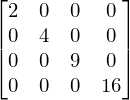

In [38]:
diag(2, 4, 9, 16)

#### Projections

In [42]:
u1 = Matrix([1, 2, 1, 1])
u2 = Matrix([-2, 1, -1, 1])
u3 = Matrix([1, 1, -2, -1])
u4 = Matrix ([-1, 1, 1, -1])

# Project u4 on to u1
u4.project(u1)

#### Check orthogonality

In [43]:
# You can check using the dot product
display(u1.dot(u2))
display(u1.dot(u3))
display(u1.dot(u4))

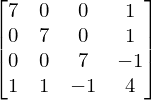

In [44]:
# Or you can use the fact that UtU will yield 0's on the off diagonals:

U = u1.row_join(u2).row_join(u3).row_join(u4)
U.T*U

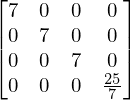

In [46]:
# We interpret this as u1-u3 are all orthogonal to each other but u4 is not orthogonal to any. Let us create an
# orthogonal u4 and redo it:
u4 = u4 - u4.project(u1)-u4.project(u2)-u4.project(u3)
U = u1.row_join(u2).row_join(u3).row_join(u4)
U.T*U

#### Normalizing vectors

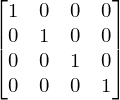

In [47]:
u1 = u1.normalized()
u2 = u2.normalized()
u3 = u3.normalized()
u4 = u4.normalized()
U = u1.row_join(u2).row_join(u3).row_join(u4)
U.T*U

In [ ]:
# Notice that the orthogonality test from previously now yields the identity matrix.

#### Length of a vector

In [48]:
u1 = Matrix([1, 2, 1, 1])
u1.norm()


#### Inserting column of ones

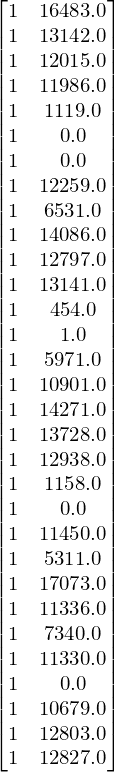

In [54]:
# Assume you need to insert a column of ones, e.g. to create a design matrix. You will need the length, i.e.
# the row length of the array. The second argument in the ones function states how many columns you want:
X = Matrix([ones(len(x), 1)]).row_join(Matrix(x))
X

#### Using Latex

In [57]:
# Assume you want to display an equation or some text using Latex and you also want to use values that were
# calculated using code. Instead of re-typing the values, you can do the following - the example is a regression
# problem where a prediction model is found. Use display to print Latex:

X = Matrix([ones(len(x), 1)]).row_join(Matrix(x))

XtX = X.T*X
Xty = X.T*Matrix(y)
Mat, _ = XtX.row_join(Xty).rref()
B = Mat[:,-1]
display(Latex("$$y_1(x) = {}+{}x$$".format(round(B[0], 2), round(B[1], 4))))

<IPython.core.display.Latex object>

#### Indexing on output of a Python function

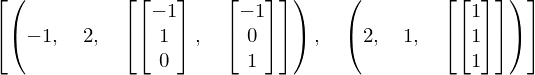

In [58]:
# Python often returns tuples. Consider the following output
A = Matrix([[0, 1, 1], [1, 0, 1], [1, 1, 0]])
vecs = A.eigenvects()
vecs

In [107]:
# The output contains a tuple with two tuples. Each of these tuples contains three more tuples, and the last of
# these contain additional tuples. Each of the two "outer" tuples represent an eigenvalue. The first entry
# is the eigenvalue, the second entry is the multiplicity, and the final entry contains the corresponding eigen-
# vectors. So let is index to obtain all the different entries:

# Retrieve the eigenvalues and their multiplicity
display(Latex(
"$\lambda_1 = {}$ and has multiplicity {}".format(vecs[0][0], vecs[0][1])))
display(Latex(
"$\lambda_2 = {}$ and has multiplicity {}".format(vecs[1][0], vecs[1][1])))
# Also retrieve the eigenvectors
display(Latex(
"The eigenvectors for $\lambda_1$ are ${}$ and ${}$ and the"
    " eigenvector for $\lambda_2$ is ${}$".format(latex(vecs[0][2][0]), latex(vecs[0][2][1]),
                                                latex(vecs[1][2][0]))))


<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>